# Next Word Prediction for University FAQs Section

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from collections import Counter
from torch.utils.data import Dataset, DataLoader
from nltk.tokenize import word_tokenize
import nltk

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [3]:
document = """Curricular Aspects  

What are the goals and objectives of the institution and where are they stated?  
The goals and objectives of the institution are to cater to the needs of national aspirations of students belonging to both rural and urban areas, offering them modern and socially relevant professional, technical, and job-oriented courses with quality and standards that meet the changing demands of globalization. Besides, the University also aims at the overall development of the students so that they may contribute to the mainstream of national development following the guiding principles of nationalism, secularism, equality, and fraternity.  

What major considerations are addressed by the goals and objectives?  
Major consideration is given to imparting subject knowledge and providing practical training and field exposure. Emphasis is also placed on providing equal employment opportunities through placement, encouragement to teachers and research scholars in obtaining research projects, and participation in national and international conferences.  

How are institutional mission and goals reflected in the curricula?  
The institutional mission and goals are carefully incorporated. The University, besides imparting knowledge in the subjects concerned, also contributes to the development of students in various aspects such as sports, culture, and personality development, as reflected through spontaneous participation of students in various extra-curricular activities. The subject matter of many courses reflects socially and regionally relevant issues. A good number of research projects in Social Sciences, Life Sciences, Physical Sciences, Bio Sciences, Biotechnology, Engineering & Technology, and Business Management aim to study the regional environment, resource endowment, and socio-cultural life of people in the region.  

What is the range of programme options available to students for awards such as degrees, certificates, and diplomas?  
Diploma, PG Diploma, UG & PG Degrees, Ph.D., and Post Doctoral degrees.  

What is the proportion of the following components in the programme options?  
Knowledge – sixty percent  
Skills – forty percent  

Are programmes flexible enough to offer students the following benefits?  
Time frame matching student convenience  
Horizontal mobility  
Elective options  
Non-core options  

How often are the existing curricula for a subject reviewed and updated?  
The courses and curriculum are reviewed and updated once a year as per need. It is a continuous process.  

Are the following mechanisms used for formulating the curricular content of new programmes?  
Regular Boards of Studies  
Expert committees  
National curricular sources  
Feedback from peers  
International curricular sources  

How long does it take to introduce a new programme of study after it has been conceptualized?  
After the programme is conceptualized, it is submitted to relevant statutory bodies, such as the Board of Studies of the subject, Academic Council, and Executive Council. After approval, it is implemented within three to four months. All the exercises for new programmes are completed before the next session starts.  

What percentage of the members of the Boards of Studies or other academic committees are external? Enclose the guidelines for BOS.  
Fifty percent in Board of Studies and sixty percent in Research Degree Committees are external members, nominated by the Vice-Chancellor.  

Are there other strategies to review academic programmes besides the Academic Council?  
Yes  

If yes, give details about what, when, and how often such reviews are made.  
Reviews are conducted through the Board of Studies, including subject experts, deans, and heads of departments, with the permission of the Vice-Chancellor, whenever needed.  

To what extent are laboratory work, field work, and projects incorporated in each programme of study?  
A minimum of twenty-five percent of each semester or year curriculum.  

Furnish details of the following aspects of curriculum design:  

Innovations such as modular curricula  
Each programme consists of essential parts like statistics, mathematical ability, and computer knowledge. Additionally, each programme provides modules in the form of special papers. Some papers also cover the study of allied areas of compulsory and optional subjects. The study of allied areas is necessary as required in specific courses.  

Interdisciplinary and multidisciplinary approach  
The University has introduced a system of establishing Institutes of Higher Learning to integrate various departments under different faculties to inculcate interdisciplinary and multidisciplinary academic culture in the institution. This approach has been introduced particularly in Life Sciences, Biotechnology, Biochemistry, Microbiology, Biomathematics, Paramedical Sciences, Mass Communication & Journalism, Library & Information Science, Pharmacy, and Computer Sciences.  

Any other highlights  
The organization of seminars, conferences, and workshops by different departments of the University is a regular feature to keep faculty and students abreast of the latest research and developments in various fields. Eminent guests and faculty are also invited by the University for special lectures. The University has adopted the national curriculum developed by the UGC in almost all vocational courses. Special attention is given to incorporating the latest tools and technologies into the teaching programmes of the University, particularly in the emerging areas of Biotechnology, Bio-Sciences, Bio-Informatics, Information Technology, Engineering, Paramedical Sciences, and Pharmacy."""

In [4]:
# tokenize
tokens = word_tokenize(document.lower())
# it still contain repeated tokens

In [5]:
tokens

['curricular',
 'aspects',
 'what',
 'are',
 'the',
 'goals',
 'and',
 'objectives',
 'of',
 'the',
 'institution',
 'and',
 'where',
 'are',
 'they',
 'stated',
 '?',
 'the',
 'goals',
 'and',
 'objectives',
 'of',
 'the',
 'institution',
 'are',
 'to',
 'cater',
 'to',
 'the',
 'needs',
 'of',
 'national',
 'aspirations',
 'of',
 'students',
 'belonging',
 'to',
 'both',
 'rural',
 'and',
 'urban',
 'areas',
 ',',
 'offering',
 'them',
 'modern',
 'and',
 'socially',
 'relevant',
 'professional',
 ',',
 'technical',
 ',',
 'and',
 'job-oriented',
 'courses',
 'with',
 'quality',
 'and',
 'standards',
 'that',
 'meet',
 'the',
 'changing',
 'demands',
 'of',
 'globalization',
 '.',
 'besides',
 ',',
 'the',
 'university',
 'also',
 'aims',
 'at',
 'the',
 'overall',
 'development',
 'of',
 'the',
 'students',
 'so',
 'that',
 'they',
 'may',
 'contribute',
 'to',
 'the',
 'mainstream',
 'of',
 'national',
 'development',
 'following',
 'the',
 'guiding',
 'principles',
 'of',
 'nation

In [6]:
Counter(tokens)

Counter({',': 65,
         'the': 59,
         'of': 44,
         'and': 41,
         '.': 29,
         'to': 19,
         'in': 19,
         'are': 18,
         '?': 12,
         'is': 11,
         'a': 8,
         'sciences': 8,
         'what': 7,
         'students': 7,
         'university': 7,
         'as': 7,
         'programme': 7,
         'for': 6,
         'goals': 5,
         'national': 5,
         'courses': 5,
         'also': 5,
         'following': 5,
         'by': 5,
         'subject': 5,
         'research': 5,
         'such': 5,
         'study': 5,
         'percent': 5,
         'programmes': 5,
         'it': 5,
         'studies': 5,
         'academic': 5,
         'curricular': 4,
         'areas': 4,
         'development': 4,
         'knowledge': 4,
         'how': 4,
         'various': 4,
         '&': 4,
         'options': 4,
         'curriculum': 4,
         'has': 4,
         'each': 4,
         'aspects': 3,
         'objectives': 3,
         

In [7]:
Counter(tokens).keys()

dict_keys(['curricular', 'aspects', 'what', 'are', 'the', 'goals', 'and', 'objectives', 'of', 'institution', 'where', 'they', 'stated', '?', 'to', 'cater', 'needs', 'national', 'aspirations', 'students', 'belonging', 'both', 'rural', 'urban', 'areas', ',', 'offering', 'them', 'modern', 'socially', 'relevant', 'professional', 'technical', 'job-oriented', 'courses', 'with', 'quality', 'standards', 'that', 'meet', 'changing', 'demands', 'globalization', '.', 'besides', 'university', 'also', 'aims', 'at', 'overall', 'development', 'so', 'may', 'contribute', 'mainstream', 'following', 'guiding', 'principles', 'nationalism', 'secularism', 'equality', 'fraternity', 'major', 'considerations', 'addressed', 'by', 'consideration', 'is', 'given', 'imparting', 'subject', 'knowledge', 'providing', 'practical', 'training', 'field', 'exposure', 'emphasis', 'placed', 'on', 'equal', 'employment', 'opportunities', 'through', 'placement', 'encouragement', 'teachers', 'research', 'scholars', 'in', 'obtaini

In [8]:
# build vocab[list of all Unique tokens]
vocab = {'<unk>':0}

for token in Counter(tokens).keys(): # Counter --> give unique token(as key) and their count(as value) in dictionary.
  if token not in vocab:             # We want key() of Counter(tokens)
    vocab[token] = len(vocab)

vocab

{'<unk>': 0,
 'curricular': 1,
 'aspects': 2,
 'what': 3,
 'are': 4,
 'the': 5,
 'goals': 6,
 'and': 7,
 'objectives': 8,
 'of': 9,
 'institution': 10,
 'where': 11,
 'they': 12,
 'stated': 13,
 '?': 14,
 'to': 15,
 'cater': 16,
 'needs': 17,
 'national': 18,
 'aspirations': 19,
 'students': 20,
 'belonging': 21,
 'both': 22,
 'rural': 23,
 'urban': 24,
 'areas': 25,
 ',': 26,
 'offering': 27,
 'them': 28,
 'modern': 29,
 'socially': 30,
 'relevant': 31,
 'professional': 32,
 'technical': 33,
 'job-oriented': 34,
 'courses': 35,
 'with': 36,
 'quality': 37,
 'standards': 38,
 'that': 39,
 'meet': 40,
 'changing': 41,
 'demands': 42,
 'globalization': 43,
 '.': 44,
 'besides': 45,
 'university': 46,
 'also': 47,
 'aims': 48,
 'at': 49,
 'overall': 50,
 'development': 51,
 'so': 52,
 'may': 53,
 'contribute': 54,
 'mainstream': 55,
 'following': 56,
 'guiding': 57,
 'principles': 58,
 'nationalism': 59,
 'secularism': 60,
 'equality': 61,
 'fraternity': 62,
 'major': 63,
 'considerations

In [9]:
len(vocab) # Unique tokens

356

In [10]:
# extract sentence from data.
document.split('\n')[5]

'What major considerations are addressed by the goals and objectives?  '

In [11]:
input_sentences = document.split('\n')

Now replace "What" with it's corresponding token value in vocab
Similarly, 'is' --> 'the' --> 'course'

In [ ]:
for sentence in input_sentences:
    print(word_tokenize(sentence.lower()))

['curricular', 'aspects']
[]
['what', 'are', 'the', 'goals', 'and', 'objectives', 'of', 'the', 'institution', 'and', 'where', 'are', 'they', 'stated', '?']
['the', 'goals', 'and', 'objectives', 'of', 'the', 'institution', 'are', 'to', 'cater', 'to', 'the', 'needs', 'of', 'national', 'aspirations', 'of', 'students', 'belonging', 'to', 'both', 'rural', 'and', 'urban', 'areas', ',', 'offering', 'them', 'modern', 'and', 'socially', 'relevant', 'professional', ',', 'technical', ',', 'and', 'job-oriented', 'courses', 'with', 'quality', 'and', 'standards', 'that', 'meet', 'the', 'changing', 'demands', 'of', 'globalization', '.', 'besides', ',', 'the', 'university', 'also', 'aims', 'at', 'the', 'overall', 'development', 'of', 'the', 'students', 'so', 'that', 'they', 'may', 'contribute', 'to', 'the', 'mainstream', 'of', 'national', 'development', 'following', 'the', 'guiding', 'principles', 'of', 'nationalism', ',', 'secularism', ',', 'equality', ',', 'and', 'fraternity', '.']
[]
['what', 'majo

In [12]:
def text_to_indices(sentence, vocab): # sentence = ['about', 'the', 'program']

  numerical_sentence = []

  for token in sentence:   # token = about (iter1)
    if token in vocab:     # about in vocab at index=1 True
      numerical_sentence.append(vocab[token])     # vocab[about] will give 1 and append.
    else:
      numerical_sentence.append(vocab['<unk>'])   # If not in vocab append '0' which is value of <unk>

  return numerical_sentence


In [13]:
for sentence in input_sentences:
    print(text_to_indices(word_tokenize(sentence.lower()), vocab))
    break

# ['about', 'the', 'program'] --> [1,2,3] in vocab

[1, 2]


In [14]:
input_numerical_sentences = []

for sentence in input_sentences:
  input_numerical_sentences.append(text_to_indices(word_tokenize(sentence.lower()), vocab))


In [15]:
input_numerical_sentences

[[1, 2],
 [],
 [3, 4, 5, 6, 7, 8, 9, 5, 10, 7, 11, 4, 12, 13, 14],
 [5,
  6,
  7,
  8,
  9,
  5,
  10,
  4,
  15,
  16,
  15,
  5,
  17,
  9,
  18,
  19,
  9,
  20,
  21,
  15,
  22,
  23,
  7,
  24,
  25,
  26,
  27,
  28,
  29,
  7,
  30,
  31,
  32,
  26,
  33,
  26,
  7,
  34,
  35,
  36,
  37,
  7,
  38,
  39,
  40,
  5,
  41,
  42,
  9,
  43,
  44,
  45,
  26,
  5,
  46,
  47,
  48,
  49,
  5,
  50,
  51,
  9,
  5,
  20,
  52,
  39,
  12,
  53,
  54,
  15,
  5,
  55,
  9,
  18,
  51,
  56,
  5,
  57,
  58,
  9,
  59,
  26,
  60,
  26,
  61,
  26,
  7,
  62,
  44],
 [],
 [3, 63, 64, 4, 65, 66, 5, 6, 7, 8, 14],
 [63,
  67,
  68,
  69,
  15,
  70,
  71,
  72,
  7,
  73,
  74,
  75,
  7,
  76,
  77,
  44,
  78,
  68,
  47,
  79,
  80,
  73,
  81,
  82,
  83,
  84,
  85,
  26,
  86,
  15,
  87,
  7,
  88,
  89,
  90,
  91,
  88,
  92,
  26,
  7,
  93,
  90,
  18,
  7,
  94,
  95,
  44],
 [],
 [96, 4, 97, 98, 7, 6, 99, 90, 5, 100, 14],
 [5,
  97,
  98,
  7,
  6,
  4,
  101,
  102,
  44

In [16]:
len(input_numerical_sentences) # Total 59 sentences

59

**Sentences**             **Input sequences**<br>
a) [1,2,3]     ------>       [1,2]
                             [1,2,3]<br>
b) [3,5,1,2]   ------>       [3,5]
                             [3,5,1]
                             [3,5,1,2]  

In [17]:
for sentence in input_numerical_sentences:

  for i in range(1, len(sentence)):
    print(sentence[:i+1])

  break

[1, 2]


In [18]:
training_sequence = []
for sentence in input_numerical_sentences:

  for i in range(1, len(sentence)):
    training_sequence.append(sentence[:i+1])

In [19]:
training_sequence

[[1, 2],
 [3, 4],
 [3, 4, 5],
 [3, 4, 5, 6],
 [3, 4, 5, 6, 7],
 [3, 4, 5, 6, 7, 8],
 [3, 4, 5, 6, 7, 8, 9],
 [3, 4, 5, 6, 7, 8, 9, 5],
 [3, 4, 5, 6, 7, 8, 9, 5, 10],
 [3, 4, 5, 6, 7, 8, 9, 5, 10, 7],
 [3, 4, 5, 6, 7, 8, 9, 5, 10, 7, 11],
 [3, 4, 5, 6, 7, 8, 9, 5, 10, 7, 11, 4],
 [3, 4, 5, 6, 7, 8, 9, 5, 10, 7, 11, 4, 12],
 [3, 4, 5, 6, 7, 8, 9, 5, 10, 7, 11, 4, 12, 13],
 [3, 4, 5, 6, 7, 8, 9, 5, 10, 7, 11, 4, 12, 13, 14],
 [5, 6],
 [5, 6, 7],
 [5, 6, 7, 8],
 [5, 6, 7, 8, 9],
 [5, 6, 7, 8, 9, 5],
 [5, 6, 7, 8, 9, 5, 10],
 [5, 6, 7, 8, 9, 5, 10, 4],
 [5, 6, 7, 8, 9, 5, 10, 4, 15],
 [5, 6, 7, 8, 9, 5, 10, 4, 15, 16],
 [5, 6, 7, 8, 9, 5, 10, 4, 15, 16, 15],
 [5, 6, 7, 8, 9, 5, 10, 4, 15, 16, 15, 5],
 [5, 6, 7, 8, 9, 5, 10, 4, 15, 16, 15, 5, 17],
 [5, 6, 7, 8, 9, 5, 10, 4, 15, 16, 15, 5, 17, 9],
 [5, 6, 7, 8, 9, 5, 10, 4, 15, 16, 15, 5, 17, 9, 18],
 [5, 6, 7, 8, 9, 5, 10, 4, 15, 16, 15, 5, 17, 9, 18, 19],
 [5, 6, 7, 8, 9, 5, 10, 4, 15, 16, 15, 5, 17, 9, 18, 19, 9],
 [5, 6, 7, 8, 9, 5, 10, 4

In [20]:
len(training_sequence)
# 856 rows ---into---> L.S.T.M

856

In [21]:
# different length problem
training_sequence[:5]

[[1, 2], [3, 4], [3, 4, 5], [3, 4, 5, 6], [3, 4, 5, 6, 7]]

**Sentences**                        **PRE-PADDING Input sequences**<br>
a) [1,2,3]     ------>       [0,1,2{T}]
                             [1,2,3{T}]<br>
b) [3,5,1,2]   ------>       [0,0,3,5{T}]
                             [0,3,5,1{T}]
                             [3,5,1,2{T}]<br>
{T} target at that moment that's why pre-padding  

Now, we have to find **longest sequence** into trainning sequence
So that we can make batches(or input_sequences) of equal length.

In [22]:
len_list = []

for sequence in training_sequence:
  len_list.append(len(sequence))

max(len_list)

112

In [23]:
training_sequence[0]
# make it size of 62
# [0,0,0,,,,,,0,1,2]

[1, 2]

> Padding starts

In [24]:
padded_training_sequence = []
for sequence in training_sequence:

  padded_training_sequence.append([0]*(max(len_list) - len(sequence)) + sequence)

In [25]:
len(padded_training_sequence[10])

112

In [26]:
padded_training_sequence = torch.tensor(padded_training_sequence, dtype=torch.long)

In [27]:
padded_training_sequence

tensor([[  0,   0,   0,  ...,   0,   1,   2],
        [  0,   0,   0,  ...,   0,   3,   4],
        [  0,   0,   0,  ...,   3,   4,   5],
        ...,
        [  0,   0,   0,  ..., 124,  26,   7],
        [  0,   0,   0,  ...,  26,   7, 325],
        [  0,   0,   0,  ...,   7, 325,  44]])

In [28]:
padded_training_sequence.size()

torch.Size([856, 112])

In [29]:
X = padded_training_sequence[:, :-1]
y = padded_training_sequence[:,-1]

In [30]:
X

tensor([[  0,   0,   0,  ...,   0,   0,   1],
        [  0,   0,   0,  ...,   0,   0,   3],
        [  0,   0,   0,  ...,   0,   3,   4],
        ...,
        [  0,   0,   0,  ..., 318, 124,  26],
        [  0,   0,   0,  ..., 124,  26,   7],
        [  0,   0,   0,  ...,  26,   7, 325]])

In [31]:
X.shape

torch.Size([856, 111])

In [32]:
y

tensor([  2,   4,   5,   6,   7,   8,   9,   5,  10,   7,  11,   4,  12,  13,
         14,   6,   7,   8,   9,   5,  10,   4,  15,  16,  15,   5,  17,   9,
         18,  19,   9,  20,  21,  15,  22,  23,   7,  24,  25,  26,  27,  28,
         29,   7,  30,  31,  32,  26,  33,  26,   7,  34,  35,  36,  37,   7,
         38,  39,  40,   5,  41,  42,   9,  43,  44,  45,  26,   5,  46,  47,
         48,  49,   5,  50,  51,   9,   5,  20,  52,  39,  12,  53,  54,  15,
          5,  55,   9,  18,  51,  56,   5,  57,  58,   9,  59,  26,  60,  26,
         61,  26,   7,  62,  44,  63,  64,   4,  65,  66,   5,   6,   7,   8,
         14,  67,  68,  69,  15,  70,  71,  72,   7,  73,  74,  75,   7,  76,
         77,  44,  78,  68,  47,  79,  80,  73,  81,  82,  83,  84,  85,  26,
         86,  15,  87,   7,  88,  89,  90,  91,  88,  92,  26,   7,  93,  90,
         18,   7,  94,  95,  44,   4,  97,  98,   7,   6,  99,  90,   5, 100,
         14,  97,  98,   7,   6,   4, 101, 102,  44,   5,  46,  

In [33]:
y.shape

torch.Size([856])

# LSTM Model Trainning

> Creation of dataset.

In [36]:
class CustomDataset(Dataset):

  def __init__(self, X, y):
    self.X = X
    self.y = y

  def __len__(self):
    return self.X.shape[0]

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

In [37]:
dataset = CustomDataset(X,y)

In [38]:
len(dataset)

856

In [39]:
dataset[0]

(tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]),
 tensor(2))

In [40]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [41]:
for input,output in dataloader:
    print(input,output)
    break

# tensor(X) , tensor(y) --> 32 samples in a batch

tensor([[  0,   0,   0,  ..., 106, 113, 114],
        [  0,   0,   0,  ...,   0,   0, 299],
        [  0,   0,   0,  ..., 332, 333,   7],
        ...,
        [  0,   0,   0,  ...,  72, 160, 161],
        [  0,   0,   0,  ...,  26, 354,  26],
        [  0,   0,   0,  ...,   6,   4, 101]]) tensor([ 44,   7,  20, 115, 226,  79, 108, 282, 317,   7,   5,  51,   9,  92,
        201, 120,  44, 120, 197,   6,   7, 136, 162,  26,  18,  38,  46, 251,
          4, 162, 355, 102])


**LSTM Class**

In [42]:
class LSTMModel(nn.Module):

  def __init__(self, vocab_size):
    super().__init__()
    self.embedding = nn.Embedding(vocab_size, 100)
    self.lstm = nn.LSTM(100, 150, batch_first=True)
    self.fc = nn.Linear(150, vocab_size)

  def forward(self, x):
    embedded = self.embedding(x)
    intermediate_hidden_states, (final_hidden_state, final_cell_state) = self.lstm(embedded)
    output = self.fc(final_hidden_state.squeeze(0))
    return output

In [43]:
model = LSTMModel(len(vocab))

In [44]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [45]:
model.to(device)

LSTMModel(
  (embedding): Embedding(356, 100)
  (lstm): LSTM(100, 150, batch_first=True)
  (fc): Linear(in_features=150, out_features=356, bias=True)
)

In [46]:
epochs = 50
learning_rate = 0.001

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [47]:
# training loop

for epoch in range(epochs):
  total_loss = 0

  for batch_x, batch_y in dataloader:

    batch_x, batch_y = batch_x.to(device), batch_y.to(device)

    optimizer.zero_grad()

    output = model(batch_x)

    loss = criterion(output, batch_y)

    loss.backward()

    optimizer.step()

    total_loss = total_loss + loss.item()

  print(f"Epoch: {epoch + 1}, Loss: {total_loss:.4f}")

Epoch: 1, Loss: 156.6255
Epoch: 2, Loss: 139.1084
Epoch: 3, Loss: 128.2076
Epoch: 4, Loss: 120.0050
Epoch: 5, Loss: 111.9566
Epoch: 6, Loss: 103.6432
Epoch: 7, Loss: 95.5361
Epoch: 8, Loss: 87.7501
Epoch: 9, Loss: 80.2322
Epoch: 10, Loss: 73.1712
Epoch: 11, Loss: 66.0610
Epoch: 12, Loss: 59.5761
Epoch: 13, Loss: 53.5695
Epoch: 14, Loss: 47.9222
Epoch: 15, Loss: 42.6417
Epoch: 16, Loss: 37.7729
Epoch: 17, Loss: 33.4353
Epoch: 18, Loss: 29.5194
Epoch: 19, Loss: 25.9940
Epoch: 20, Loss: 23.0218
Epoch: 21, Loss: 20.2522
Epoch: 22, Loss: 17.9207
Epoch: 23, Loss: 15.9683
Epoch: 24, Loss: 14.2278
Epoch: 25, Loss: 12.7555
Epoch: 26, Loss: 11.5172
Epoch: 27, Loss: 10.4361
Epoch: 28, Loss: 9.4230
Epoch: 29, Loss: 8.6018
Epoch: 30, Loss: 7.9223
Epoch: 31, Loss: 7.2507
Epoch: 32, Loss: 6.6802
Epoch: 33, Loss: 6.2297
Epoch: 34, Loss: 5.7749
Epoch: 35, Loss: 5.3951
Epoch: 36, Loss: 5.0761
Epoch: 37, Loss: 4.7518
Epoch: 38, Loss: 4.4659
Epoch: 39, Loss: 4.2111
Epoch: 40, Loss: 4.0162
Epoch: 41, Loss:

In [48]:
# prediction

def prediction(model, vocab, text):

  # tokenize
  tokenized_text = word_tokenize(text.lower())

  # text -> numerical indices
  numerical_text = text_to_indices(tokenized_text, vocab)

  # padding
  padded_text = torch.tensor([0] * (61 - len(numerical_text)) + numerical_text, dtype=torch.long).unsqueeze(0)

  # send to model
  output = model(padded_text)

  # predicted index
  value, index = torch.max(output, dim=1)

  # merge with text
  return text + " " + list(vocab.keys())[index]



In [49]:
prediction(model, vocab, "What are the goals and objectives of the institution and where")

'What are the goals and objectives of the institution and where are'

In [50]:
import time

num_tokens = 10
input_text = "What are the goals and objectives of the institution and where"

for i in range(num_tokens):
  output_text = prediction(model, vocab, input_text)
  print(output_text)
  input_text = output_text
  time.sleep(0.5)


What are the goals and objectives of the institution and where are
What are the goals and objectives of the institution and where are they
What are the goals and objectives of the institution and where are they stated
What are the goals and objectives of the institution and where are they stated ?
What are the goals and objectives of the institution and where are they stated ? ?
What are the goals and objectives of the institution and where are they stated ? ? enclose
What are the goals and objectives of the institution and where are they stated ? ? enclose the
What are the goals and objectives of the institution and where are they stated ? ? enclose the guidelines
What are the goals and objectives of the institution and where are they stated ? ? enclose the guidelines for
What are the goals and objectives of the institution and where are they stated ? ? enclose the guidelines for bos


In [51]:
dataloader1 = DataLoader(dataset, batch_size=32, shuffle=False)

In [52]:
# Function to calculate accuracy
def calculate_accuracy(model, dataloader, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():  # No need to compute gradients
        for batch_x, batch_y in dataloader1:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            # Get model predictions
            outputs = model(batch_x)

            # Get the predicted word indices
            _, predicted = torch.max(outputs, dim=1)

            # Compare with actual labels
            correct += (predicted == batch_y).sum().item()
            total += batch_y.size(0)

    accuracy = correct / total * 100
    return accuracy

# Compute accuracy
accuracy = calculate_accuracy(model, dataloader, device)
print(f"Model Accuracy: {accuracy:.2f}%")


Model Accuracy: 98.60%


In [58]:
print(model)  # Prints model architecture


LSTMModel(
  (embedding): Embedding(356, 100)
  (lstm): LSTM(100, 150, batch_first=True)
  (fc): Linear(in_features=150, out_features=356, bias=True)
)


In [59]:
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Requires Grad: {param.requires_grad}")


Layer: embedding.weight | Size: torch.Size([356, 100]) | Requires Grad: True
Layer: lstm.weight_ih_l0 | Size: torch.Size([600, 100]) | Requires Grad: True
Layer: lstm.weight_hh_l0 | Size: torch.Size([600, 150]) | Requires Grad: True
Layer: lstm.bias_ih_l0 | Size: torch.Size([600]) | Requires Grad: True
Layer: lstm.bias_hh_l0 | Size: torch.Size([600]) | Requires Grad: True
Layer: fc.weight | Size: torch.Size([356, 150]) | Requires Grad: True
Layer: fc.bias | Size: torch.Size([356]) | Requires Grad: True


Epoch 1/50, Loss: 5.8030, Accuracy: 5.96%
Epoch 2/50, Loss: 5.1216, Accuracy: 11.10%
Epoch 3/50, Loss: 4.7129, Accuracy: 12.97%
Epoch 4/50, Loss: 4.3976, Accuracy: 16.94%
Epoch 5/50, Loss: 4.0865, Accuracy: 18.81%
Epoch 6/50, Loss: 3.7762, Accuracy: 22.90%
Epoch 7/50, Loss: 3.4637, Accuracy: 25.58%
Epoch 8/50, Loss: 3.1712, Accuracy: 30.37%
Epoch 9/50, Loss: 2.8798, Accuracy: 34.81%
Epoch 10/50, Loss: 2.6070, Accuracy: 38.90%
Epoch 11/50, Loss: 2.3435, Accuracy: 46.03%
Epoch 12/50, Loss: 2.0972, Accuracy: 51.75%
Epoch 13/50, Loss: 1.8678, Accuracy: 60.98%
Epoch 14/50, Loss: 1.6511, Accuracy: 68.22%
Epoch 15/50, Loss: 1.4564, Accuracy: 77.22%
Epoch 16/50, Loss: 1.2892, Accuracy: 83.06%
Epoch 17/50, Loss: 1.1341, Accuracy: 88.08%
Epoch 18/50, Loss: 1.0003, Accuracy: 90.19%
Epoch 19/50, Loss: 0.8735, Accuracy: 92.99%
Epoch 20/50, Loss: 0.7667, Accuracy: 94.16%
Epoch 21/50, Loss: 0.6793, Accuracy: 95.44%
Epoch 22/50, Loss: 0.6050, Accuracy: 96.26%
Epoch 23/50, Loss: 0.5385, Accuracy: 96.85

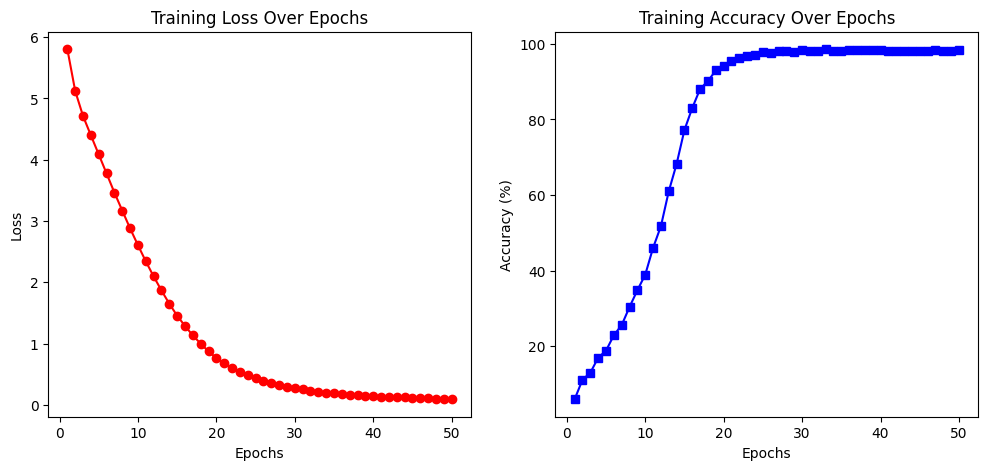

In [62]:
# Ensure input is converted to LongTensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, 100)
        self.lstm = nn.LSTM(100, 150, batch_first=True)
        self.fc = nn.Linear(150, vocab_size)

    def forward(self, x):
        x = x.long()  # Fix for Embedding layer input type issue
        embedded = self.embedding(x)
        output, _ = self.lstm(embedded)
        output = self.fc(output[:, -1, :])  # Take the last time-step output
        return output

# Initialize model
model = LSTMModel(vocab_size=356).to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Track loss and accuracy
train_losses = []
train_accuracies = []

epochs = 50

for epoch in range(epochs):
    total_loss = 0
    correct = 0
    total = 0

    for batch_x, batch_y in dataloader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)

        optimizer.zero_grad()
        output = model(batch_x)

        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Compute accuracy
        _, predicted = torch.max(output, dim=1)
        correct += (predicted == batch_y).sum().item()
        total += batch_y.size(0)

    avg_loss = total_loss / len(dataloader)
    accuracy = 100 * correct / total

    train_losses.append(avg_loss)
    train_accuracies.append(accuracy)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")

# Plot Accuracy and Loss Graphs
plt.figure(figsize=(12, 5))

# Loss graph
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, marker='o', linestyle='-', color='r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')

# Accuracy graph
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_accuracies, marker='s', linestyle='-', color='b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy Over Epochs')

plt.show()
